# K-Nearest Neighbors
In this notebook, I'm using KNN algorithm on [Heart Disease UCI dataset](https://www.kaggle.com/ronitf/heart-disease-uci) from Kaggle to predict presence of heart disease in the pacient.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Working with Anonymized Data

In [6]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop('target', axis=1)
scaler.fit(features)
scaled_features = scaler.transform(features)

# Created Scaled DF
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(2)

C:\Python\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922


## Test Train Split 

In [11]:
X = df_feat
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [12]:
X_train.shape

(212, 13)

## Fit KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
# Training Score
knn.score(X_train, y_train)

0.8537735849056604

## Prediction Score of the 1st model

In [15]:
from sklearn.model_selection import cross_val_score

# Cross Validation
test_score = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
model1_score = round(test_score.mean(),5)
model1_score

0.80139

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[29  9]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        38
           1       0.84      0.92      0.88        53

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.84      0.85        91
weighted avg       0.86      0.86      0.86        91



## N_neighbors optimization

In [17]:
k_range = range(1,41)
k_scores = []

for n_neighbors in k_range:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    
    # Cross Validation
    scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(round(scores.mean(),5))

Text(0, 0.5, 'Accuracy')

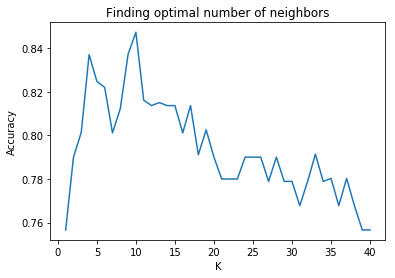

In [22]:
score_plot = sns.lineplot(x=k_range,y=k_scores)
plt.title('Finding optimal number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

## Prediction score of the 2nd model 

In [19]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

# Cross Validation
scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
model2_score = round(scores.mean(),5)
model2_score

0.84722

In [20]:
improvement = model2_score - model1_score
improvement = round(improvement, 2)*100
print('We have improved the model by ' + str(improvement) + ' %')

We have improved the model by 5.0 %


In [21]:
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[29  9]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        38
           1       0.84      0.92      0.88        53

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.84      0.85        91
weighted avg       0.86      0.86      0.86        91

